# Single Unit Data and Spike Trains

Based on assignment 4<br>
<font color = red >This Demo and the attached files from course PSYO/NESC 3505 Neural Data Science, at Dalhousie University. You should not disseminate, distribute or copy. </font>
<br><font color = red >I am NOT post inappropriate or copyrighted content, advertise or promote outside products or organizations </font>
<br>© Copyright 2020.PSYO/NESC 3505 FAll 2020 https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html
<br>**For demonstration purposes only**

## Background 

### Data Source
>These data were provided courtesy of Dr. Nathan Crowder, Department of Psychology & Neuroscience, Dalhousie University. Data are from 23 mouse primary visual cortex neurons; for simplicity we are going to work with data firstly from only one neuron, then we'll load data from 3 neurons to get experience working with a larger data set. Note that these are not data from a multielectrode array. Data were recorded from single electrodes that were embedded directly into single neurons, a technique called patch clamping. We have data from multiple neurons because Dr. Crowder's team painstakingly recorded from several neurons in each of a few animals.

---–PSYO 3505 Assignment 4 cell1

### Experimental Design

>The experiment involved presenting drifting (oscillating) sine wave gratings to mice while recording from electrodes in the primary visual cortex. The gratings oscillated (drifted) at a speed of 2 Hz. The contrast of the stimuli were varied systematically over ten levels from 4 (virtually no contrast between the brightest and darkest parts of the sine wave grating, which would appear as uniform grey) to 100% (gratings varying between black and white, as in the example grating in the textbook). Contrast is therefore one of the experimental variables; the levels of contrast used were 4, 8, 12, 16, 24, 32, 48, 64, 84, and 100%.
<br>
<br>
A second variable is condition:the stimuli were presented under 2 experimental conditions: control (CTRL) and adaptation (ADAPT):
<br>
<br>
In the CTRL condition, each trial began with a 2000 ms blank grey screen, then the oscillating sine wave grating at the trial's contrast level (see below) for 1000 ms, then 1000 ms blank grey screen.
In the ADAPT condition, each trial started with the adaptation stimulus (a 50% contrast sine wave grating for 2000 ms), then the sine wave grating at the trial's contrast level (see below), then 1000 ms blank grey screen.
A total of 8 trials were presented at each contrast level, in each condition. Each trial was 4000 ms in duration, and data were sampled at 1000 Hz, meaning that we have a data point every 1 ms.

---–PSYO 3505 Assignment 4 cell2

### Predictions
>* In the control condition, latency to first spike is expected to decrease with increasing contrast.
>* Some primary visual cortex cells are phase sensitive (so-called simple cells), so in response to a drifting sine wave grating they will oscillate between excitation and inhibition at the same temporal frequency of the stimulus (2 Hz in this case).

---–PSYO 3505 Assignment 4 cell3

## Single neuron data

### Read file and check it

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First of all we need define the experiment parameters

In [2]:
# Conditions
cond_labels = ['CTRL', 'ADAPT'] 

# Labels for the levels of stimulus contrast
contr_labels = [4, 8, 12, 16, 24, 32, 48, 64, 84, 100]

# Labels for repetitions (trials)
rep_labels = list(np.arange(1, 8))
num_reps = len(rep_labels)

# Time point labels - each trial is 4000 ms long
time_labels = list(np.arange(4000))

# Stimulus timing
stim_on_time = 2000
stim_off_time = stim_on_time + 1000

adapt_on_time = 0
adapt_off_time = adapt_on_time + 2000

In [3]:
df = pd.read_csv('crowder_1_neuron.csv')

In [4]:
df.head()

,neuron,time,repetition,contrast,condition,spike
0,m6_11,0,1,4,CTRL,0
1,m6_11,1,1,4,CTRL,0
2,m6_11,2,1,4,CTRL,0
3,m6_11,3,1,4,CTRL,0
4,m6_11,4,1,4,CTRL,0


In [5]:
df.tail()

,neuron,time,repetition,contrast,condition,spike
639995,m6_11,3995,8,100,ADAPT,0
639996,m6_11,3996,8,100,ADAPT,0
639997,m6_11,3997,8,100,ADAPT,0
639998,m6_11,3998,8,100,ADAPT,0
639999,m6_11,3999,8,100,ADAPT,0


By using .unique() methods We can get idea about number of repertition and contrasts

In [6]:
print(df['repetition'].unique())
print(df['contrast'].unique())

[1 2 3 4 5 6 7 8]
[  4   8  12  16  24  32  48  64  84 100]


We want to know number of spikes in DF

In [7]:
len(df[df['spike'] == 1])

1955

Because the data is stored in the data frames, 'Advanced indexing' technique can apply here. like if I want to know the repetion 1 Contrast 100 CTRL and spike data I can write code like this :

In [8]:
df[(df['repetition']==1)&(df['contrast']==100)&(df['condition']=='CTRL')&(df['spike']==1)]

,neuron,time,repetition,contrast,condition,spike
288797,m6_11,797,1,100,CTRL,1
290153,m6_11,2153,1,100,CTRL,1
290362,m6_11,2362,1,100,CTRL,1
290420,m6_11,2420,1,100,CTRL,1
290439,m6_11,2439,1,100,CTRL,1
290473,m6_11,2473,1,100,CTRL,1
290500,m6_11,2500,1,100,CTRL,1
290557,m6_11,2557,1,100,CTRL,1
290633,m6_11,2633,1,100,CTRL,1
290657,m6_11,2657,1,100,CTRL,1


### Visualization

This is a complex experiment so we'll need lots of subplots to see all trials for all contrast levels, and both conditions. Here we can using Raster plots show the experitement 

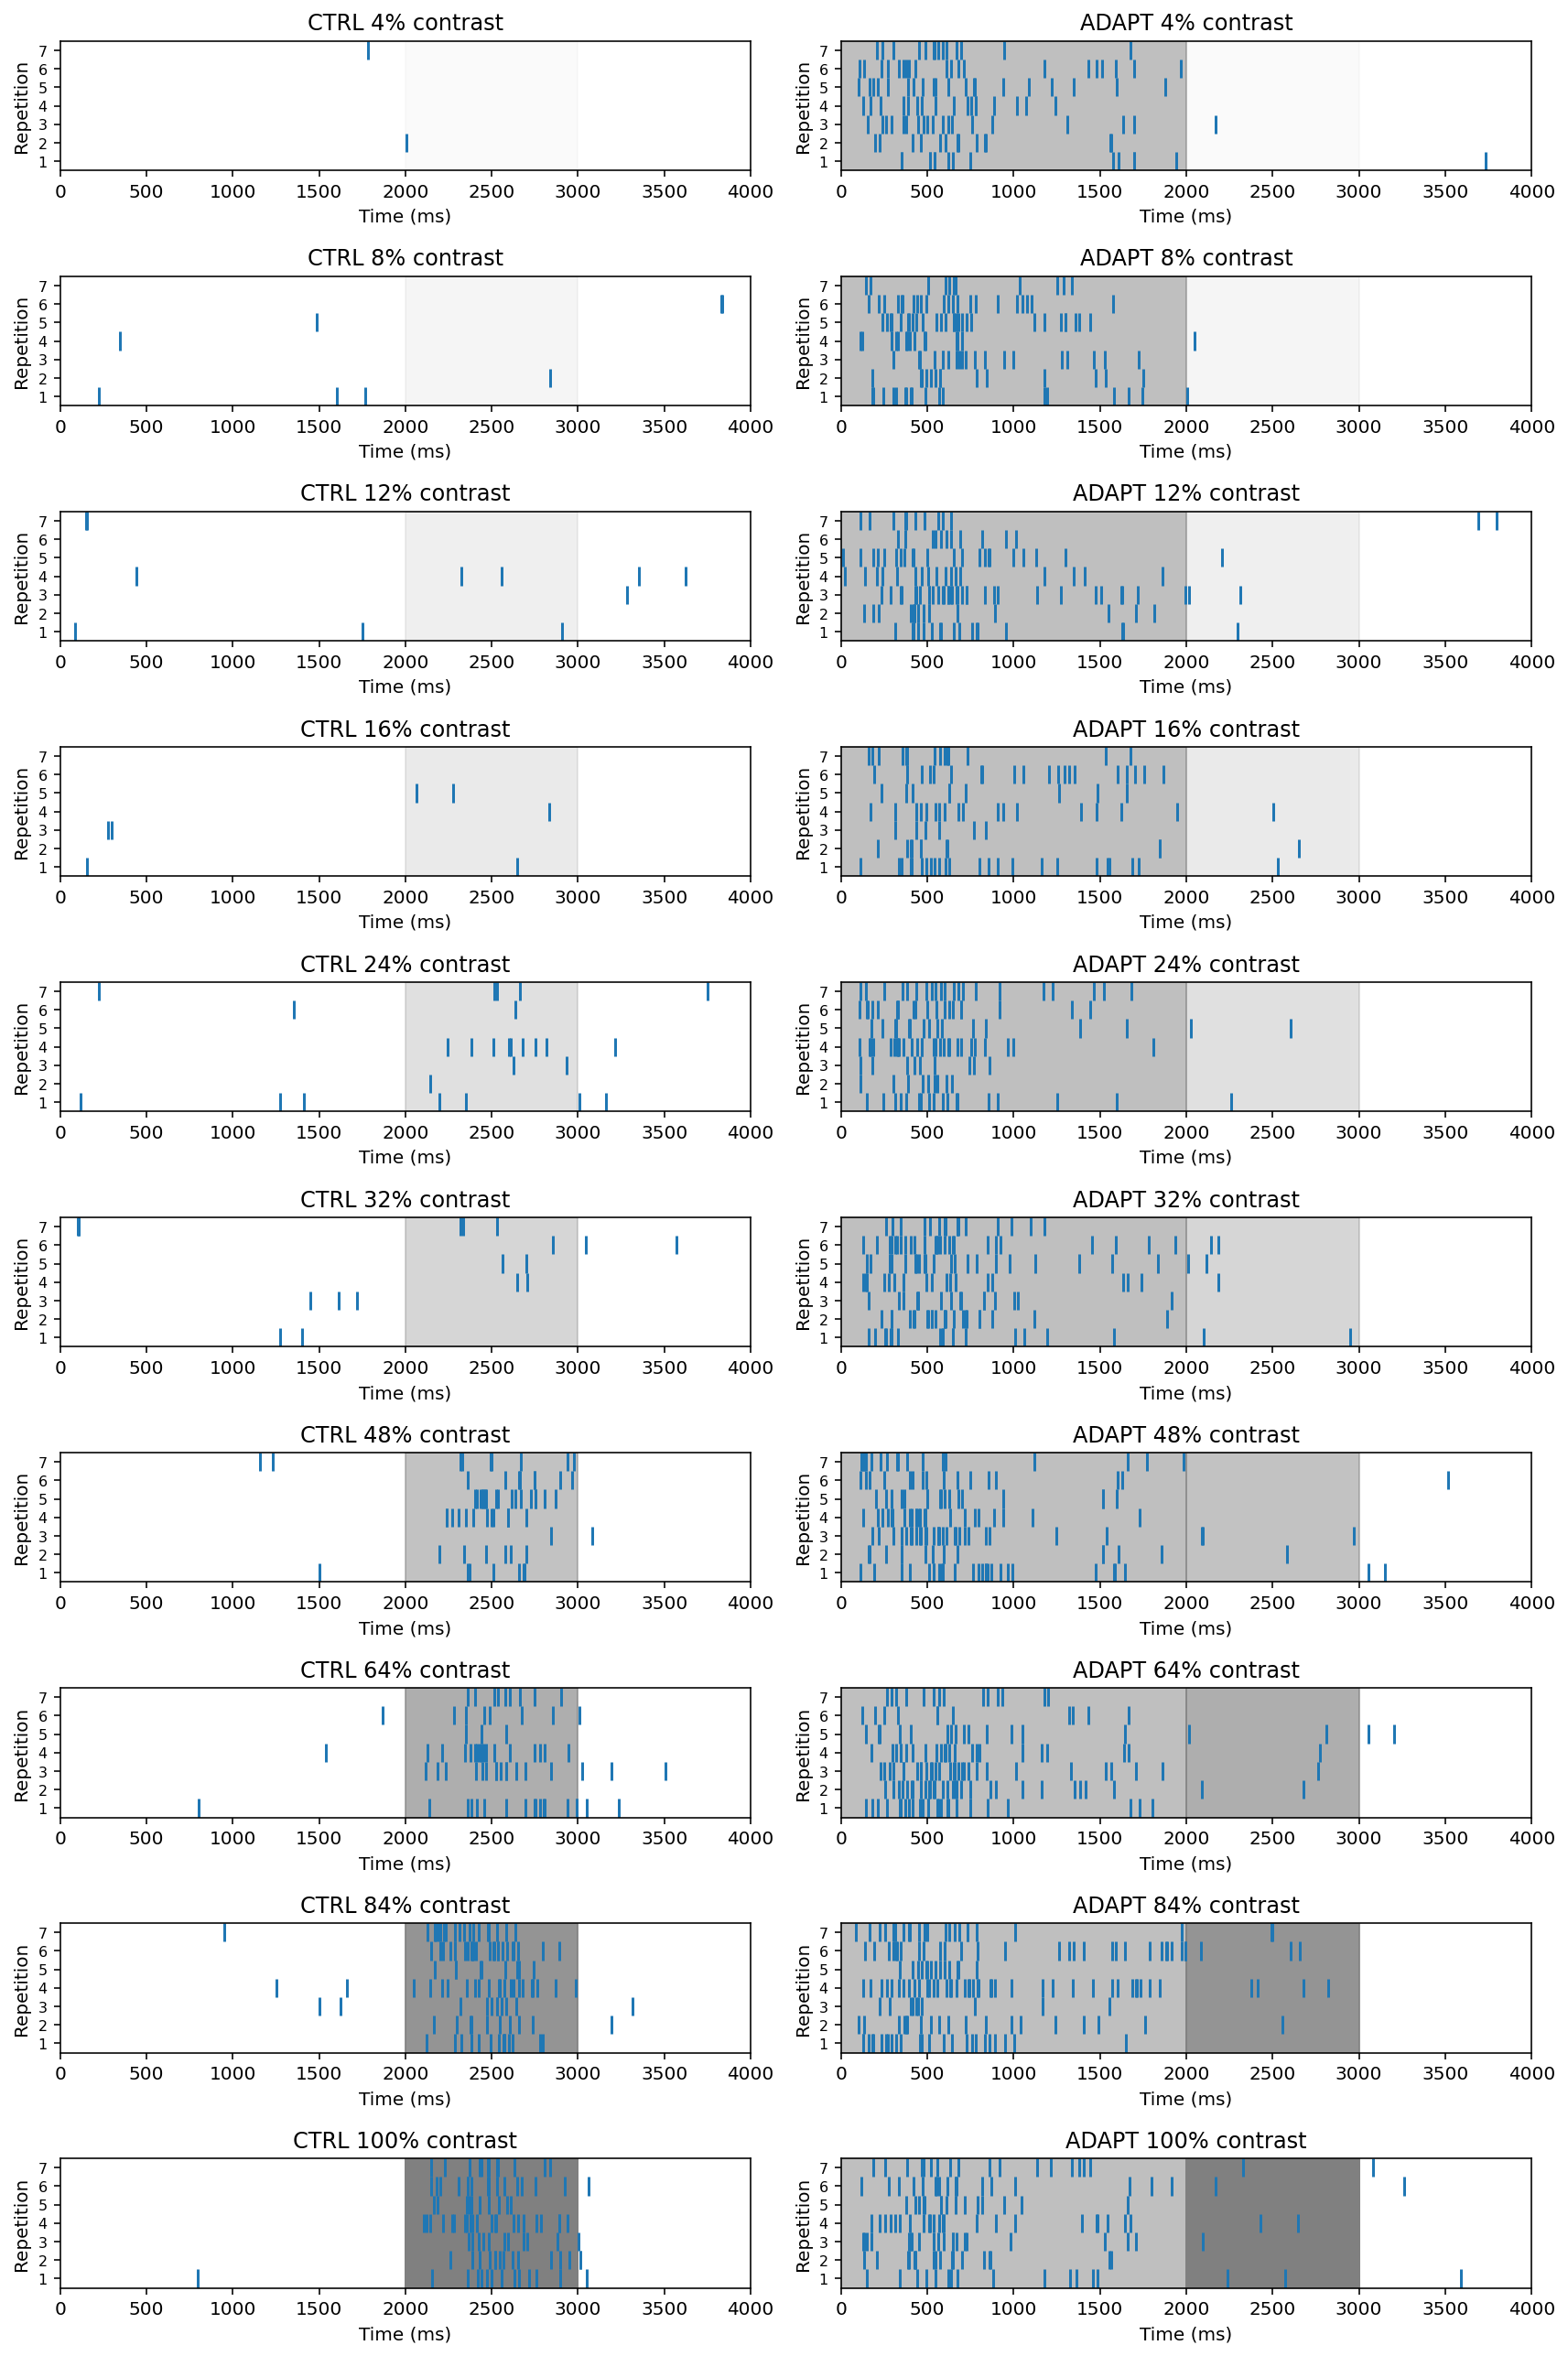

In [9]:
fig = plt.figure(figsize=[12,18])

subplot_counter = 1 

for contr in contr_labels:
    for cond in cond_labels:

        ax = fig.add_subplot(len(contr_labels), len(cond_labels), subplot_counter)

        # Show adaptation grating at 50% contrast
        if cond == 'ADAPT':
            plt.axvspan(0, stim_on_time-1, alpha=0.5, color='grey')

        # shading indicates stimulus on period
        plt.axvspan(stim_on_time, stim_off_time, alpha=contr/100, color='grey')

        for rep in rep_labels:
            spike_times = df[(df['repetition']==rep)&(df['contrast']==contr)&(df['condition']==cond)&(df['spike']==1)]['time']
            plt.vlines(spike_times, rep-1, rep);

        # Pretty formatting
        plt.xlim([0, max(time_labels)+1])
        plt.ylim([0, len(rep_labels)])
        plt.title(cond + ' ' + str(contr) + '% contrast')
        plt.xlabel('Time (ms)')
        plt.ylabel('Repetition',)
        plt.yticks([x + 0.5 for x in range(num_reps)], [str(x + 1) for x in range(num_reps)], size=8) 
        plt.tight_layout()
        subplot_counter += 1
        
plt.show()

Also, we can draw peri-stimulus time histogram (PTSH) plot rather than rasters. By summing the number of spikes in short time bins, PSTHs allow us to visualize when the neuron is most likely to spike.

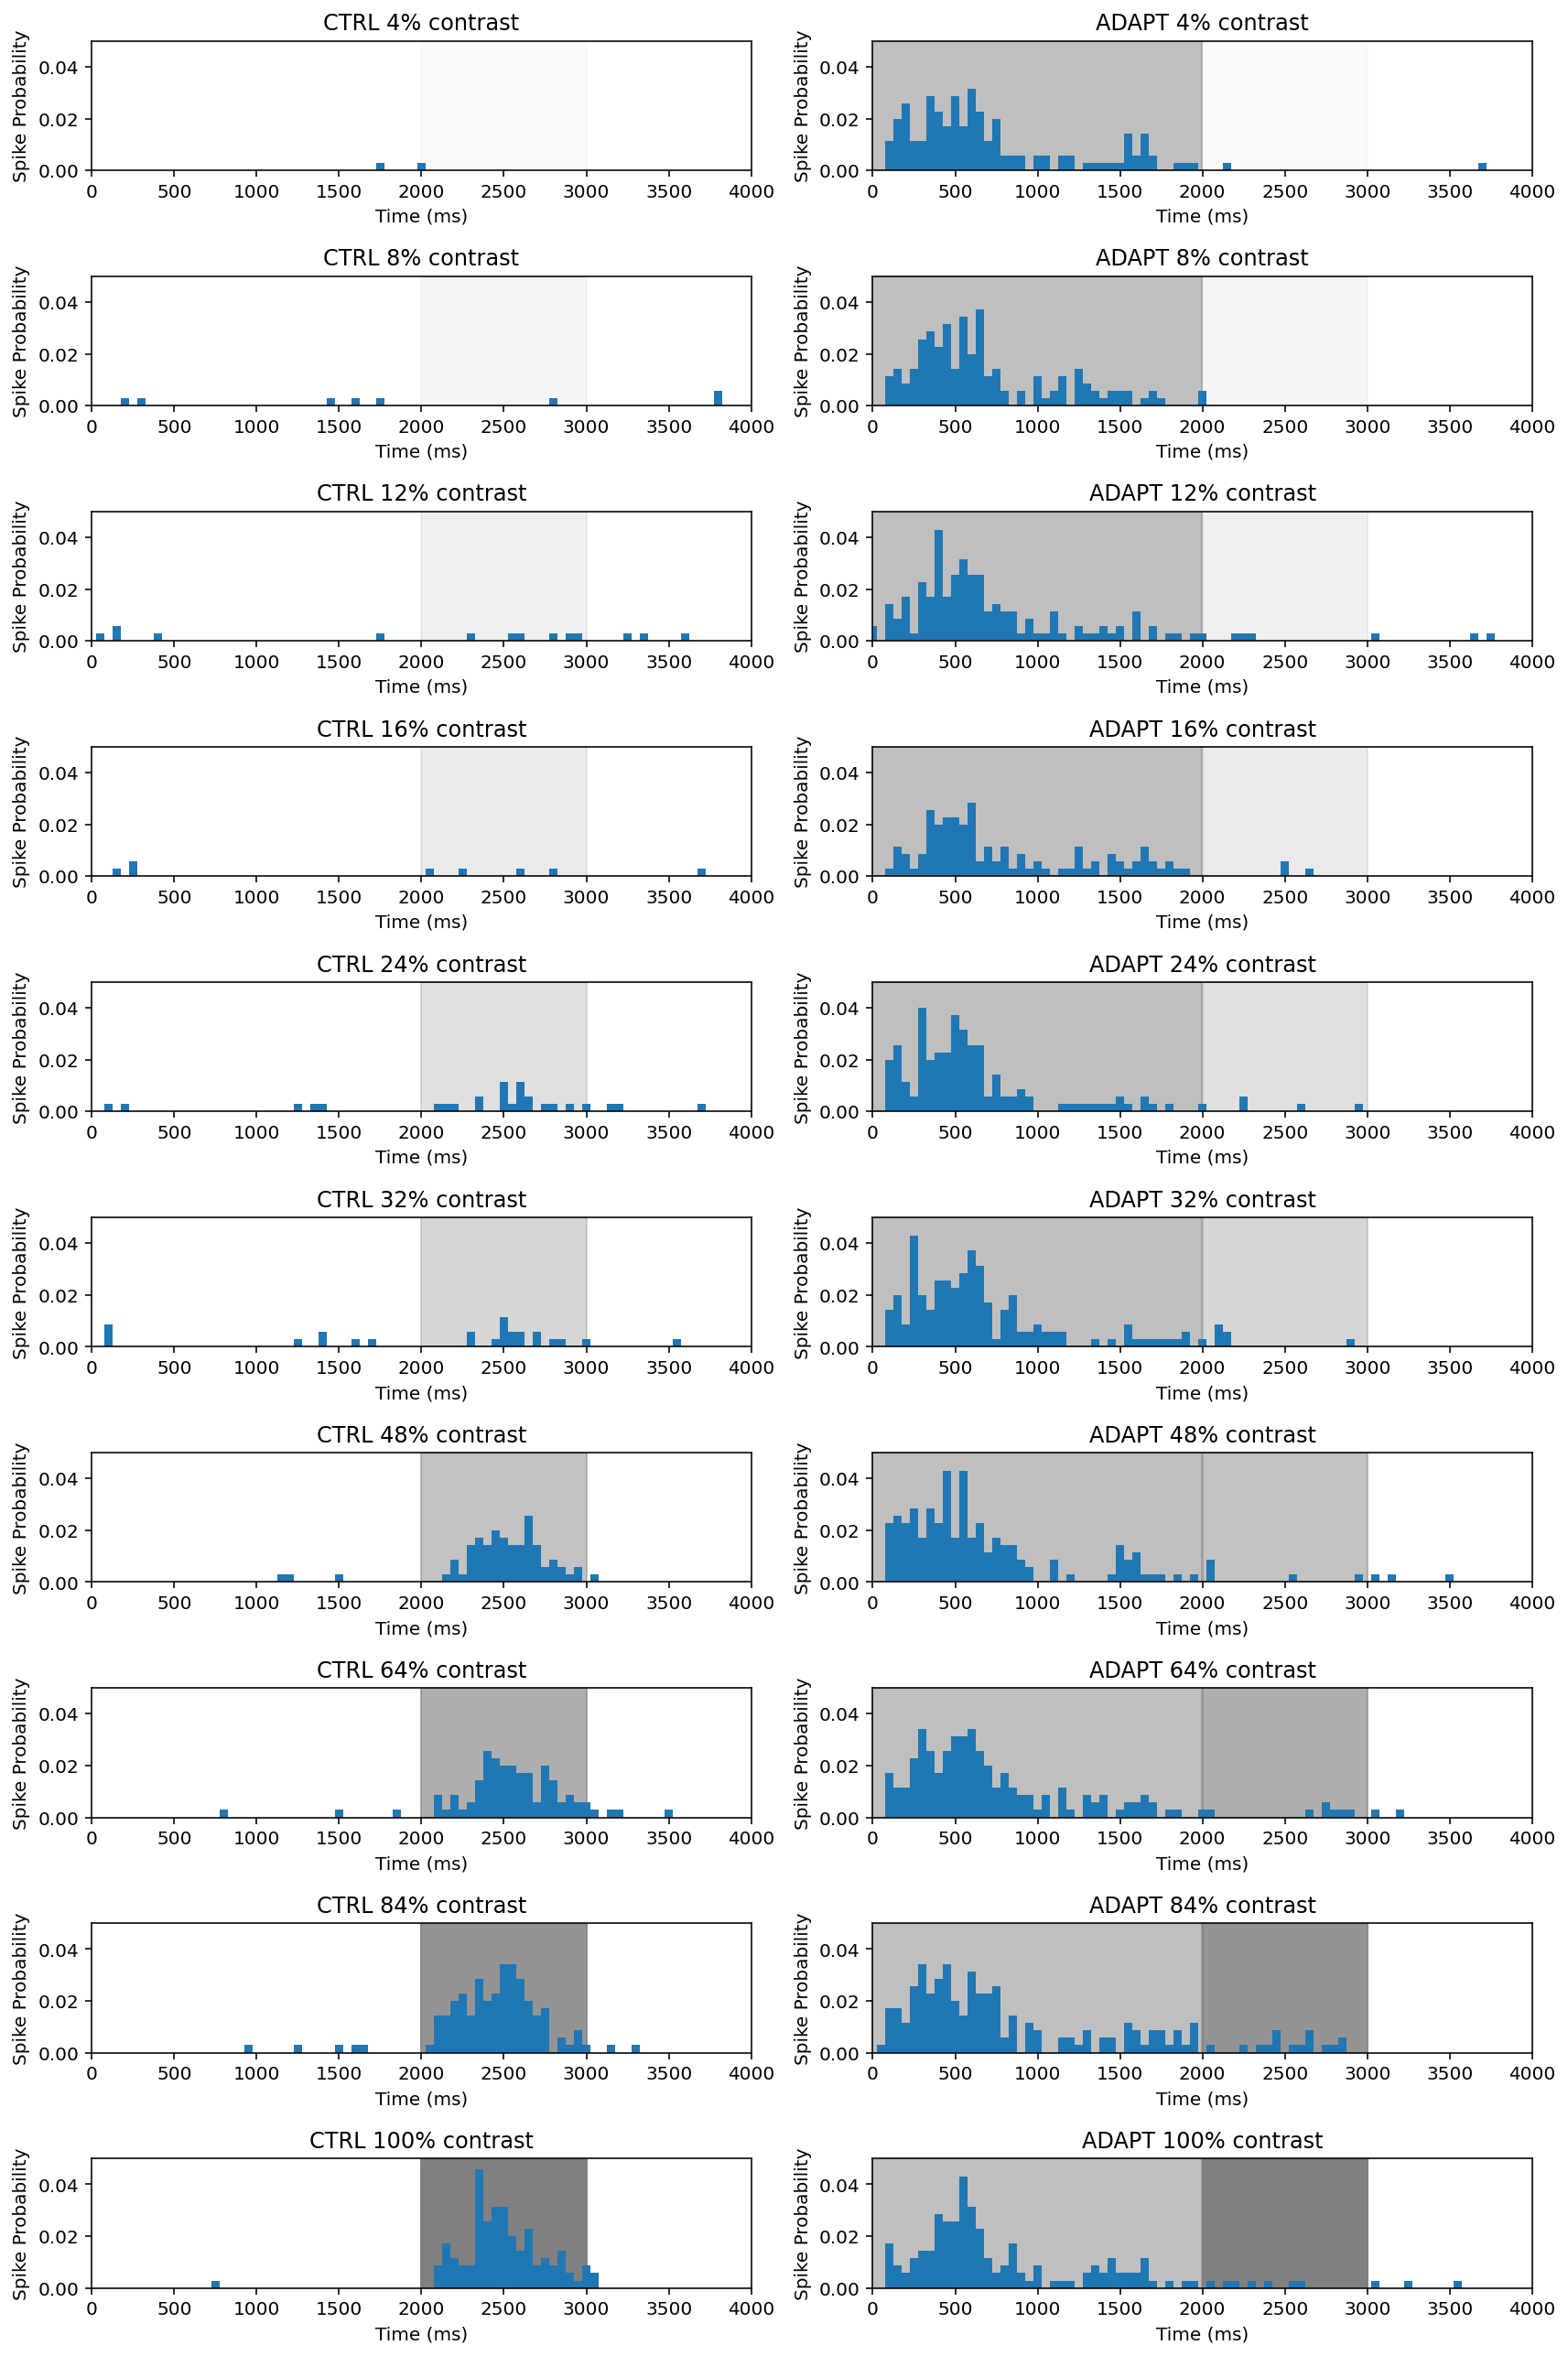

In [10]:
hist_bin_width = 50 
time_bins = np.arange(0, max(time_labels), hist_bin_width)

fig = plt.figure(figsize=[12,18])

subplot_counter = 1 

for contr in contr_labels:
    for cond in cond_labels:

        ax = fig.add_subplot(len(contr_labels), len(cond_labels), subplot_counter)

        # Show adaptation grating at 50% contrast
        if cond == 'ADAPT':
            plt.axvspan(0, stim_on_time-1, alpha=0.5, color='grey')
            
        # shading indicates stimulus on period
        plt.axvspan(stim_on_time, stim_off_time, alpha=contr/100, color='grey')
        spike_times = df[(df['contrast']==contr)&(df['condition']==cond)&(df['spike']==1)]['time']
        spike_count, bins = np.histogram(spike_times, bins=time_bins)
        spike_count = spike_count/(num_reps * hist_bin_width)
        plt.bar(bins[:-1], spike_count,width=hist_bin_width)
        
        # Pretty formatting
        plt.xlim([0, max(time_labels)+1])
        plt.ylim([0, 0.05])
        plt.title(cond + ' ' + str(contr) + '% contrast')
        plt.xlabel('Time (ms)')
        plt.ylabel('Spike Probability')
        
        plt.tight_layout()
        subplot_counter += 1
        
plt.show()

Next we try to plot heat map 

> Like a PSTH, the heat map has time on the x axis, and plots the probability of spikes at each time point. However, the heat maps a more condensed, information-rich, and efficient version of the PSTHs: rather than needing 10 plots to show the histograms for all 10 levels of intensity.

---Neural Data Science *Heat Maps, Interpolation, and Colour Map Choice*

Using nested list comprehension to create two columns: condition and contrast

In [11]:
condition_labels = pd.DataFrame([[cond, contr] for cond in cond_labels for contr in contr_labels ],columns=['condition', 'contrast'])

In [12]:
condition_labels.head()

,condition,contrast
0,CTRL,4
1,CTRL,8
2,CTRL,12
3,CTRL,16
4,CTRL,24


In [13]:
psth_df_list=[]
for cond in cond_labels:
    for contr in contr_labels:
        spike_times = df[(df['contrast']==contr)&(df['condition']==cond)&(df['spike']==1)]['time']
        spike_count, bins = np.histogram(spike_times, bins=time_bins)
        psth_df_list.append(spike_count) 

In [14]:
# Combine labels and data
psth_df = pd.concat([condition_labels, pd.DataFrame(psth_df_list)], axis=1)     

In [15]:
psth_df = psth_df.set_index(['condition','contrast'])

Before the final plot, we need check the dataframe

In [16]:
psth_df.head()

0   1   2   3   4   5   6   7   8   9   ...  69  70  71  \
condition contrast                                          ...               
CTRL      4          0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
          8          0   0   0   0   1   0   1   0   0   0  ...   0   0   0   
          12         0   1   0   2   0   0   0   0   1   0  ...   0   0   0   
          16         0   0   0   1   0   2   0   0   0   0  ...   0   0   0   
          24         0   0   1   0   1   0   0   0   0   0  ...   0   0   0   

                    72  73  74  75  76  77  78  
condition contrast                              
CTRL      4          0   0   0   0   0   0   0  
          8          0   0   0   0   2   0   0  
          12         1   0   0   0   0   0   0  
          16         0   0   1   0   0   0   0  
          24         0   0   1   0   0   0   0  

[5 rows x 79 columns]

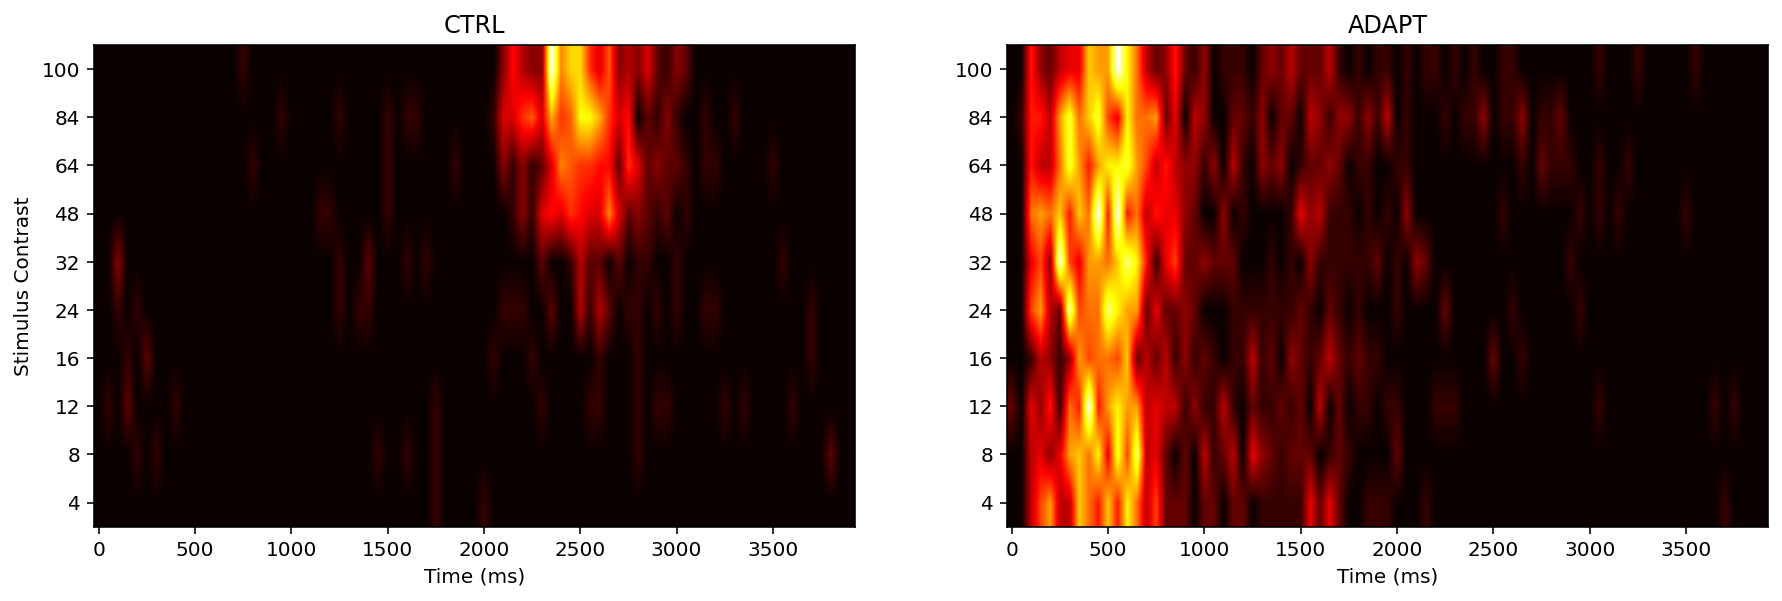

In [17]:
fig = plt.figure(figsize=[15,30])
subplot_counter = 1

for cond in cond_labels:
    
    ax = fig.add_subplot(1, 2, subplot_counter)
    plt.imshow(psth_df.loc[cond],origin='lower',cmap='hot',interpolation='bilinear',aspect =5)
    
    plt.title(cond)
    xticks = range(0, len(time_bins), 10)
    plt.xticks(xticks,
               time_bins[xticks])
    plt.xlabel('Time (ms)')
    plt.yticks([x for x,y in enumerate(contr_labels)], 
               [x for x in contr_labels])
    if cond == cond_labels[0]:
        plt.ylabel('Stimulus Contrast')

    subplot_counter += 1
    
plt.show()

Additionally, the colour map parameter can be changed. Consider the colour-blindness and have good perceptually, like 'viridis'below

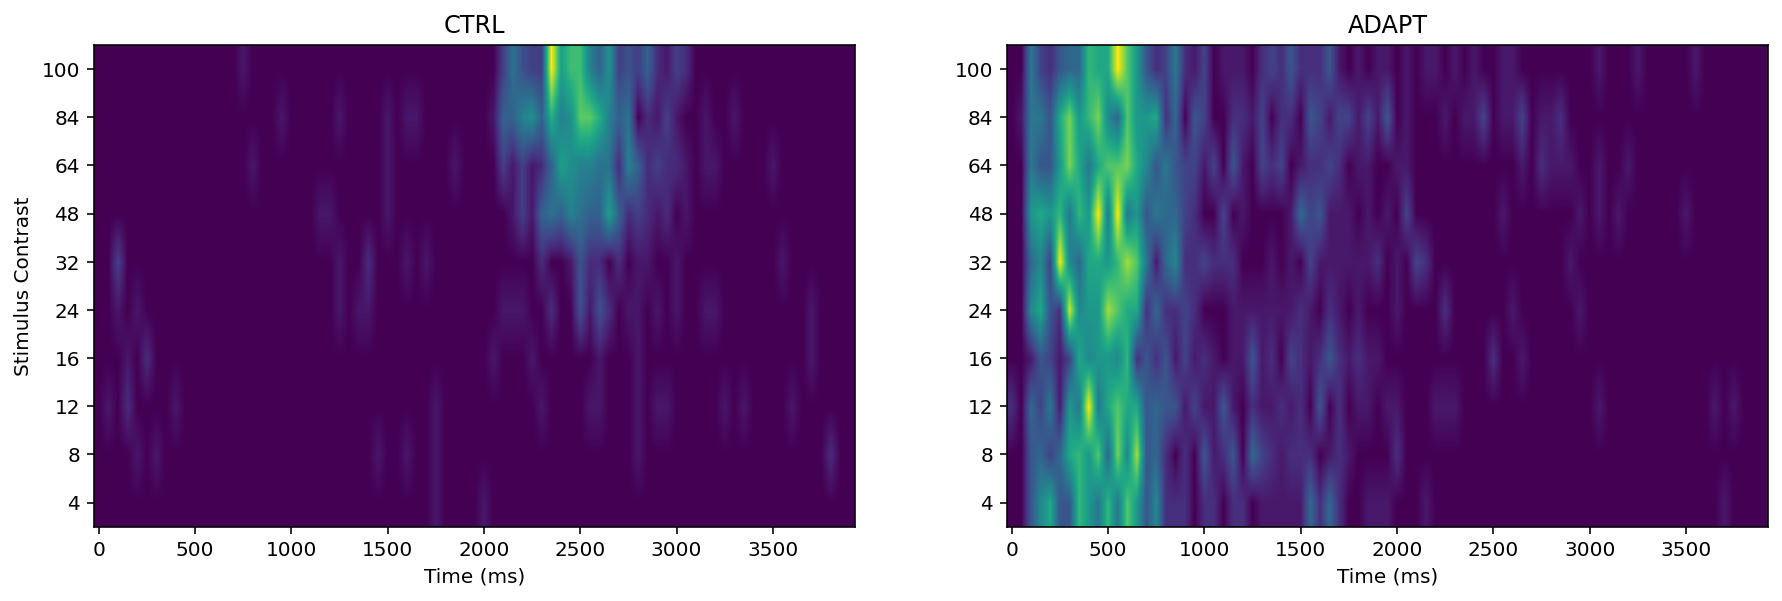

In [18]:
fig = plt.figure(figsize=[15,30])
subplot_counter = 1 # used to track subplots

for cond in cond_labels:
    
    ax = fig.add_subplot(1, 2, subplot_counter)
    plt.imshow(psth_df.loc[cond],origin='lower',cmap='viridis',interpolation='bilinear',aspect =5)
    
    plt.title(cond)
    xticks = range(0, len(time_bins), 10)
    plt.xticks(xticks,
               time_bins[xticks])
    plt.xlabel('Time (ms)')
    plt.yticks([x for x,y in enumerate(contr_labels)], 
               [x for x in contr_labels])
    if cond == cond_labels[0]:
        plt.ylabel('Stimulus Contrast')

    subplot_counter += 1
    
plt.show()

## Working with multiple neurons

### Read file and check it

In [19]:
df3 = pd.read_csv('crowder_3_neurons.csv')

In [20]:
df3.head()

,neuron,time,repetition,contrast,condition,spike
0,m1_6,0,1,4,CTRL,0
1,m1_6,1,1,4,CTRL,0
2,m1_6,2,1,4,CTRL,0
3,m1_6,3,1,4,CTRL,0
4,m1_6,4,1,4,CTRL,0


In [21]:
df3.tail()

,neuron,time,repetition,contrast,condition,spike
1919995,m6_3a2,3995,8,100,ADAPT,0
1919996,m6_3a2,3996,8,100,ADAPT,0
1919997,m6_3a2,3997,8,100,ADAPT,0
1919998,m6_3a2,3998,8,100,ADAPT,0
1919999,m6_3a2,3999,8,100,ADAPT,0


In this case, we want to know how many neurons in the data

In [22]:
neuron_labels = df3['neuron'].unique()
print(neuron_labels)

['m1_6' 'm3_11' 'm6_3a2']


### Visualization

Again, we create labels dataframe first

In [23]:
condition_labels = pd.DataFrame([[neur,cond, contr] for neur in neuron_labels for cond in cond_labels for contr in contr_labels ],columns=['neuron','condition','contrast',])
condition_labels.head(10)

,neuron,condition,contrast
0,m1_6,CTRL,4
1,m1_6,CTRL,8
2,m1_6,CTRL,12
3,m1_6,CTRL,16
4,m1_6,CTRL,24
5,m1_6,CTRL,32
6,m1_6,CTRL,48
7,m1_6,CTRL,64
8,m1_6,CTRL,84
9,m1_6,CTRL,100


Due to we have three neurons and each neruons has two conditions and 10 contrasts, we need douvle check it and make sure no error in here

In [24]:
condition_labels

,neuron,condition,contrast
0,m1_6,CTRL,4
1,m1_6,CTRL,8
2,m1_6,CTRL,12
3,m1_6,CTRL,16
4,m1_6,CTRL,24
5,m1_6,CTRL,32
6,m1_6,CTRL,48
7,m1_6,CTRL,64
8,m1_6,CTRL,84
9,m1_6,CTRL,100


This time we no longer plot Raster or PTSH (actually we have 3 neurons * 2 conditions * 10 contrasts need 60 histograms !)instead Heat maps directly 

Reformat the data from raw data set

In [26]:
psth_df3_list = []
for neuron in neuron_labels:
     for cond in cond_labels:
        for contr in contr_labels:
            spike_times = df3[(df3['neuron']==neuron)&(df3['contrast']==contr)&(df3['condition']==cond)&(df3['spike']==1)]['time']
            spike_count, bins = np.histogram(spike_times,bins=time_bins)
            psth_df3_list.append(spike_count)

In [32]:
#Combine labels and data together 
psth_df3 = pd.concat([condition_labels,pd.DataFrame(psth_df3_list)],axis =1)
psth_df3 = psth_df3.set_index(['neuron','condition','contrast'])
psth_df3.head(20)

0   1   2   3   4   5   6   7   8   9   ...  69  \
neuron condition contrast                                          ...       
m1_6   CTRL      4          0   0   3   2   0   1   4   0   1   4  ...   0   
                 8          1   0   0   1   3   5   2   1   5   2  ...   1   
                 12         1   2   2   0   3   2   4   3   5   1  ...   2   
                 16         5   1   4   5   3   1   2   2   2   1  ...   3   
                 24         1   1   2   1   1   4   2  12   5   1  ...   2   
                 32         1   3   3   2   2   1   1   0   1   0  ...   1   
                 48         2   5   5   0   2   1   3   2   1   2  ...   2   
                 64         0   3   4   3   2   1   0   0   4   0  ...   1   
                 84         1   5   1   4   2   2   2   3   3   3  ...   1   
                 100        2   2   2   3   3   2   1   2   0   1  ...   3   
       ADAPT     4          4   0  13   4  17  10  14  16  10   9  ...   0   
                 8          0   5  16  10  14   8  12  11   9  12  ...   4   
                 12         2   1   9   9  13   5  10   7   8   7  ...   1   
                 16         3   6  14  11  16  11  12   9  10  11  ...   2   
                 24         3   6  13  10  17  12   9  13  10   6  ...   0   
                 32         1   2  12   7  11  11   9  11   8   7  ...   2   
                 48         1   4  12   7  15  14  11  14  11   9  ...   1   
                 64         1   1  14   7  14  13  10   9   8   8  ...   0   
                 84         4   2  18  10  14   8   6  10  11   7  ...   0   
                 100        1   5  11   9   9   8  11   9  11   8  ...   0   

                           70  71  72  73  74  75  76  77  78  
neuron condition contrast                                      
m1_6   CTRL      4          2   4   1   1   2   2   4   2   0  
                 8          3   1   0   1   0   1   1   2   2  
                 12         4   1   2   3   2   5   0   4   4  
                 16         3   1   3   2   2   0   5   0   2  
                 24         0   1   3   1   0   1   0   1   4  
                 32         3   0   0   0   1   1   1   0   1  
                 48         1   1   4   0   0   1   0   1   0  
                 64         2   6   0   3   2   1   0   1   0  
                 84         0   4   3   1   3   1   3   1   1  
                 100        0   0   0   0   2   1   0   0   1  
       ADAPT     4          4   0   0   3   2   2   0   1   0  
                 8          4   3   2   3   6   4   4   2   4  
                 12         1   0   3   0   2   0   0   2   3  
                 16         1   0   0   0   4   0   4   2   2  
                 24         2   3   1   1   0   3   1   0   0  
                 32         1   2   1   0   3   0   1   2   1  
                 48         2   0   0   2   1   1   2   0   1  
                 64         3   1   1   0   2   2   3   0   0  
                 84         0   0   0   0   1   0   0   1   0  
                 100        0   0   0   1   0   1   3   0   1  

[20 rows x 79 columns]

In [33]:
psth_df3.tail(20)

0   1   2   3   4   5   6   7   8   9   ...  69  \
neuron condition contrast                                          ...       
m6_3a2 CTRL      4          4   4   0   0   1   3   1   1   3   2  ...   2   
                 8          5   1   2   2   1   5   3   1   2  10  ...   4   
                 12         4   1   3   4   2   2   2   3   1   3  ...   1   
                 16         3   4   1   0   1   1   3   4   8   0  ...   2   
                 24         3   4   0   5   2   3   1   6   3   4  ...   3   
                 32         2   2   1   0   3   0   1   0   4   4  ...   2   
                 48         2   2   4   0   7   3   2   2   2   2  ...   1   
                 64         4   4   6   3   4   0   7   3   2   5  ...   2   
                 84         4   0   2   4   6   4   7   2   0   1  ...   3   
                 100        7   4   0   3   4   2   9   4   2   4  ...   1   
       ADAPT     4          0   0  11  11  13  15  21  12  12  12  ...   3   
                 8          3   3  18  12  12  14  18  13   7  10  ...   4   
                 12         7   5  16   5  12  21  18  15  12   9  ...   2   
                 16         4   5  17   6  21  14  13  19  10  13  ...   0   
                 24         6   7  13   7  10  21  10  19   9   8  ...   3   
                 32         1   0  10  15  10  13  19  12  12   6  ...   2   
                 48         2   2  18   9  15  12  21  22  12   8  ...   5   
                 64         2   6   8  10  19  16  18  15   9  18  ...   0   
                 84         1   1  11   7   9  16  12  11  12   7  ...   4   
                 100        1   2  10  11  16  20  19  11  15  15  ...   1   

                           70  71  72  73  74  75  76  77  78  
neuron condition contrast                                      
m6_3a2 CTRL      4          1   1   4   2   7   6   3   2   4  
                 8          7   3   3   0   0   3   4   3   1  
                 12         3   2   6   5   5   3   2   1   1  
                 16         1   0   2   2   3   3   3   5   3  
                 24         0   2   3   9   1   2   3   4   2  
                 32         3   1   5   5   1   3   3   2   1  
                 48         3   3   0   6   5   4   6   0   4  
                 64         3   0   3   2   0   0   0   1   1  
                 84         4   4   2   0   1   2   0   1   1  
                 100        0   0   0   0   0   1   2   1   5  
       ADAPT     4          0   0   5   3   1   4   0   1   1  
                 8          1   2   6   9   3   2   3   2   3  
                 12         2   0   0   0   0   0   0   0   0  
                 16         0   3   0   4   1   0   1   5   2  
                 24         3   3   1   5   2   1   0   3   1  
                 32         0   3   1   3   2   1   2   2   1  
                 48         2   2   4   3   4   2   2   3   0  
                 64         2   0   2   6   0   1   2   2   4  
                 84         4   2   1   0   4   1   0   3   3  
                 100        0   0   3   2   2   3   3   1   0  

[20 rows x 79 columns]

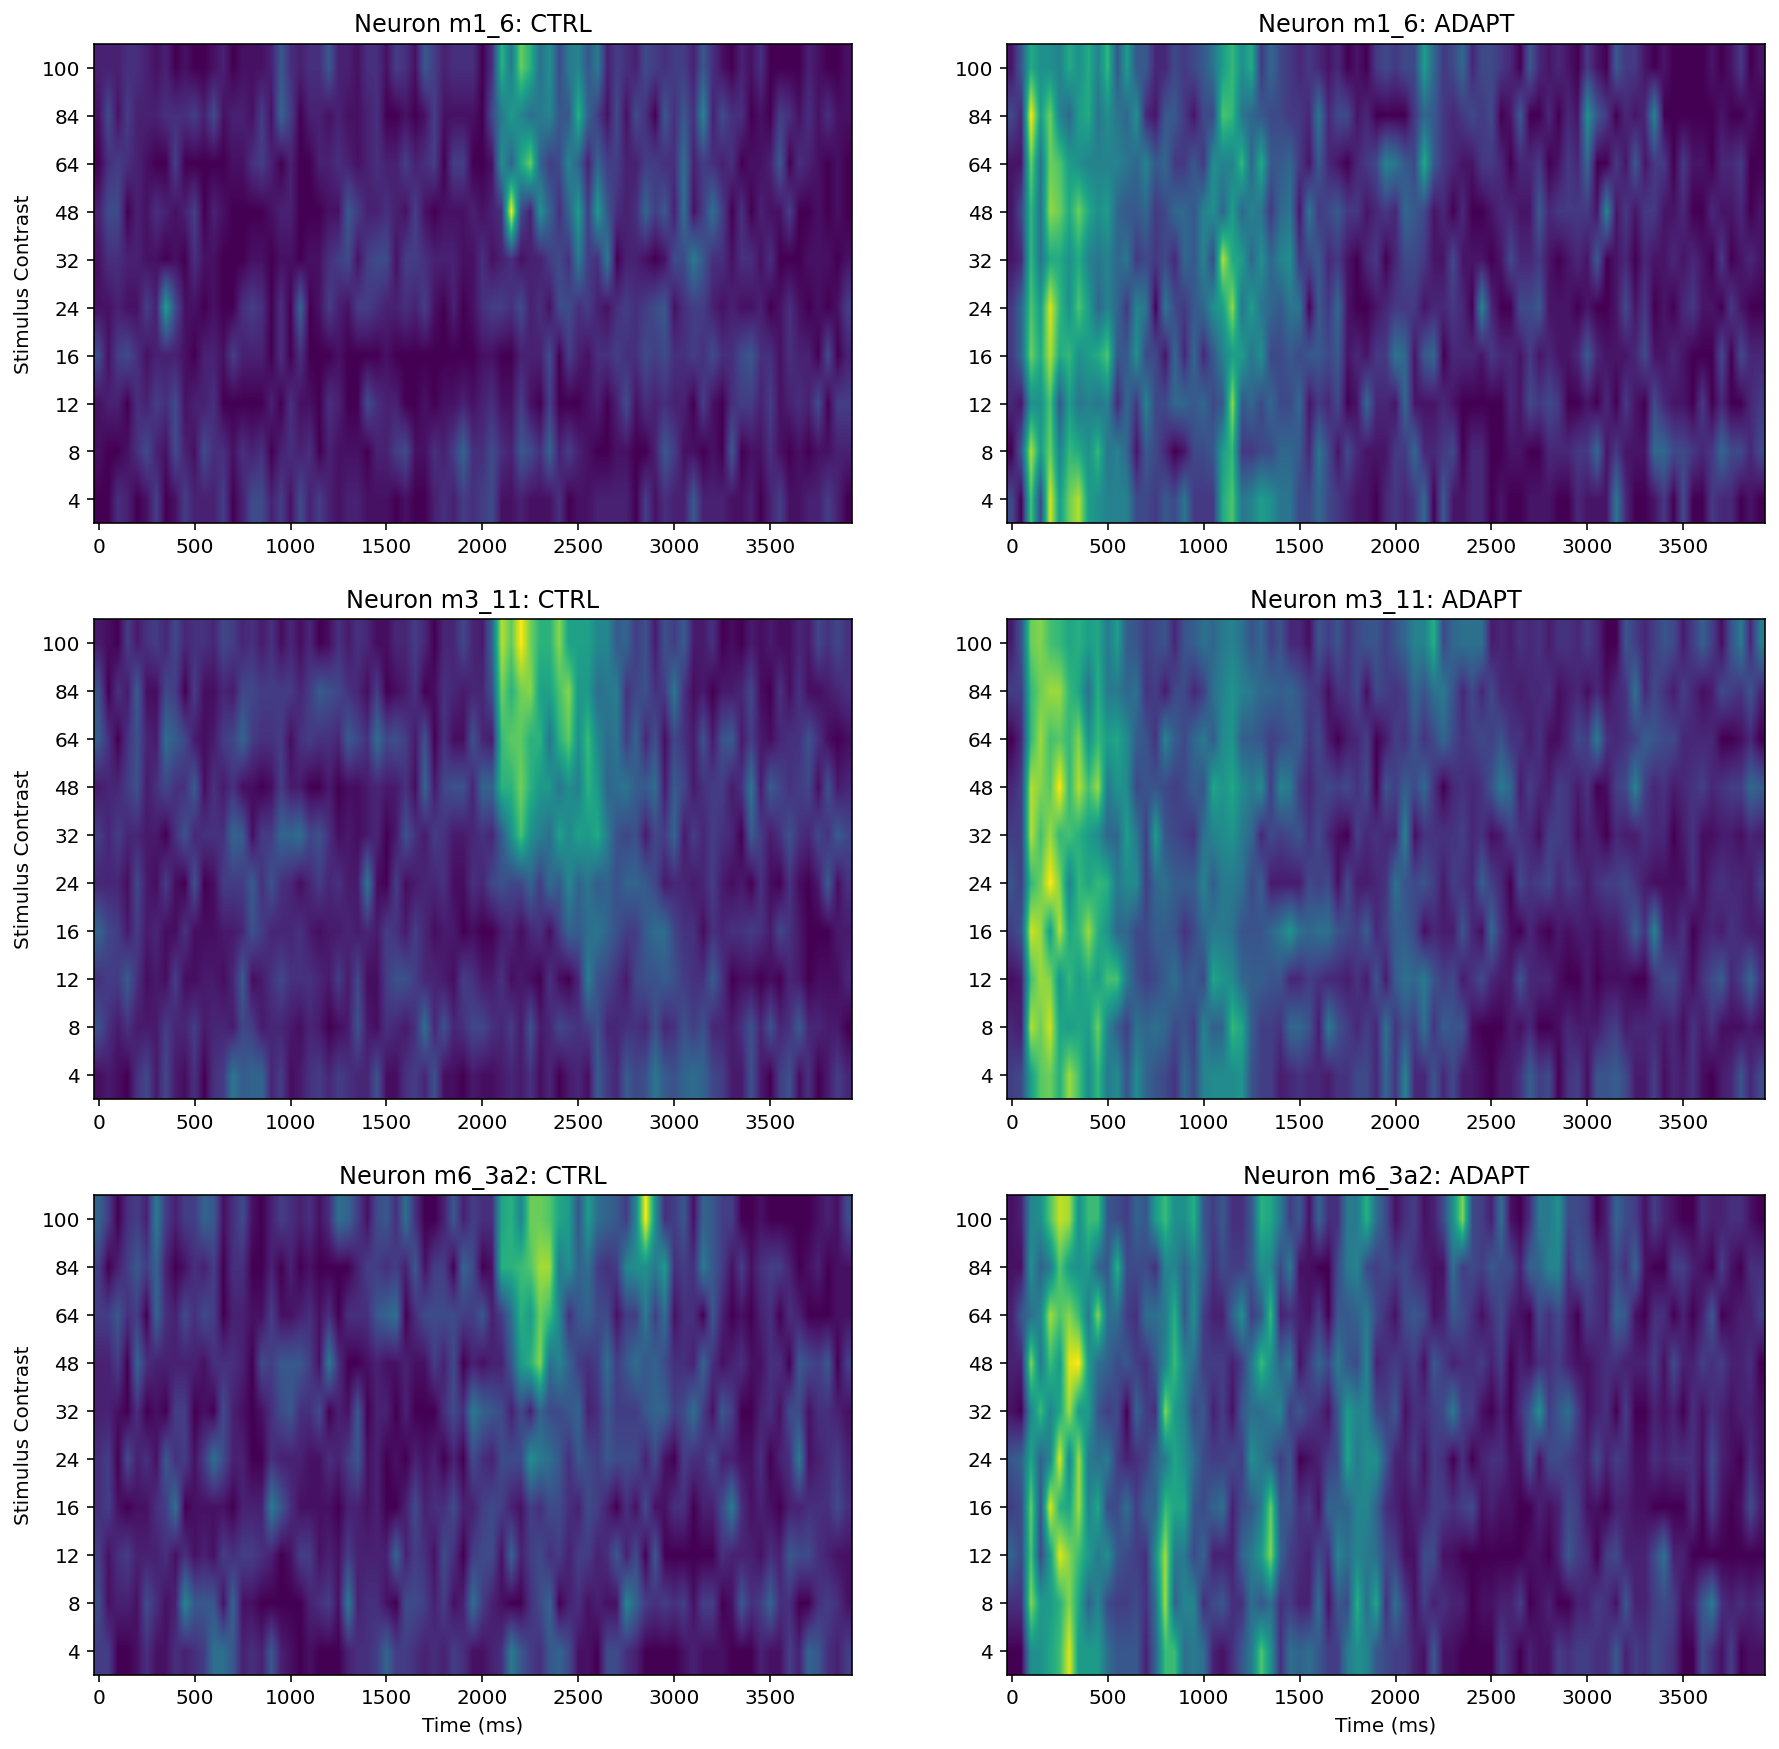

In [42]:
fig = plt.figure(figsize=[15,15])
subplot_counter = 1 

for neuron in neuron_labels:
      for cond in cond_labels:
        ax = fig.add_subplot(3, 2, subplot_counter)

        data = psth_df3.loc[neuron]
        
        plt.imshow(data.loc[cond],origin='lower',cmap='viridis',interpolation='bilinear',aspect = 5)

        
        # Nice formatting
        plt.title('Neuron ' + neuron + ': ' + cond)

        xticks = range(0, len(time_bins), 10)
        plt.xticks(xticks,time_bins[xticks])
        
        if neuron == neuron_labels[-1]:
            plt.xlabel('Time (ms)')

        plt.yticks([x for x,y in enumerate(contr_labels)], 
                   [x for x in contr_labels])

        if cond == cond_labels[0]:
            plt.ylabel('Stimulus Contrast')
        subplot_counter += 1

plt.show()

## Interpretation

According to above heat maps, there are relationship between spike rate (increase) and stimulus onset (regardless of contrast level). Specifically, in m1-6 neuron CTRL condition the ‘hot spot’ is between 2000-2500 (approximately) ms. In m3-11 neuron CTRL condition the ‘hot spot’ is between 2000-2600 (approximately) ms. In m6-3a2 neuron CTRL condition the ‘hot spot is between 2000-3000 (approximately) ms. And this experiment stimulus onset was at 2000ms.
<br>
<br>
The PTSH graph suggests that 2100 ms at 24% contrast, 2300 at 32%, 2100 at 64%, 2050 at 84%, and 2100 at 100% in the control condition, these number not support the prediction: 
* *in the control condition, latency to first spike is expected to decrease with increasing contrast*

It is remarkable that In the adaptation condition the neurons do not show a similar or systematic response to the onset of the "main" stimulus (the one that starts at 2000 ms) as in the control condition. The reason is neuronal ‘habituation (or desensitization)’ probably, namely, The neuron will not stimulus again under similar contrasts. 

Additionally, With the contrast increase i.e., from 32% to 100%. the spike rate ‘density’ has significant increase. For example, like above heat maps, neuron m3-11 CTRL, from 48% to 100% the ‘hot spot’ area is larger than other stimulus contrast. Same thing we can found in other two neurons.

Neuron m6_3a2 behavior like simple cells, (response to a drifting sine wave grating they will oscillate between excitation and inhibition at the same temporal frequency of the stimulus), We can observe this phenomenon through heatmaps Neuron m6_3a2: ADAPT . About 100ms excitation then inhibition after 500ms, next 800ms excitation 1000ms inhibition, 1300ms excitation 1400 ms inhibition and so on. Therefore these number support the prediction:
* *Some primary visual cortex cells are phase sensitive (so-called simple cells), so in response to a drifting sine wave grating they will oscillate between excitation and inhibition at the same temporal frequency of the stimulus (2 Hz in this case,2 Hz means two peaks per second).*

## References

[1] [NESC 3505 Neural Data Science, at Dalhousie University. Textbook](https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html)
<br>
[2] NESC 3505 Neural Data Science, at Dalhousie University. Assignment 5
<br>

Based on assignment 4 <br>
<font color = red >This Demo and the attached files from course PSYO/NESC 3505 Neural Data Science, at Dalhousie University. You should not disseminate, distribute or copy. </font>
<br><font color = red >I am NOT post inappropriate or copyrighted content, advertise or promote outside products or organizations </font>
<br>© Copyright 2020.PSYO/NESC 3505 FAll 2020 https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html
<br>**For demonstration purposes only**